# Task 2.1 Pass Task - Damon Vizl - S223545885 - damon.vizl@gmail.com - SIT731
## Introduction
Numpy is a number and array processing extension for Python. We can process data into arrays and perform statistical and data processing operations on those arrays.  
In this task we are processing 12 months worth of Bitcoin to USD data from Yahoos' finance site, calculating some statistical metrics, plotting the data and then analysing those plots. 

## Question 1
The Bitcoin data was downloaded from https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD on 16 Mar 22 at 1400

## Question 2
Below is the code to load the data. I have defined a local path 'dataPath' and then used the numpy.loadtxt function to load the data into a numpy array. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt


dataPath = r"./BTC-USD.csv"
rates = np.loadtxt(dataPath, encoding= "UTF-8-SIG")

## Question 3
First step is to slice the data after the 365th entry so as to return only the 2022 data. 

Built into numpy there are multiple functions that will return the arithmetic mean, minimum, first quartile, median, third quartile, maximum, standard deviation and interquartile range. 

In [2]:
rates = rates[:365]

print(f"Arithmitic Mean: {rates.mean()}")
print(f"Minimum: {rates.min()}")
print(f"First Quartile: {np.percentile(rates, 25)}")
print(f"Median: {np.median(rates)}")
print(f"Third Quartile: {np.percentile(rates, 75)}")
print(f"Maximum: {rates.max()}")
print(f"Standard Deviation: {np.std(rates)}")
print(f"Interquartile Range: {np.percentile(rates, 75)- np.percentile(rates,25)}")



Arithmitic Mean: 28197.754099452053
Minimum: 15787.28418
First Quartile: 19546.84961
Median: 23164.62891
Third Quartile: 39105.14844
Maximum: 47686.8125
Standard Deviation: 10184.056271099733
Interquartile Range: 19558.298829999996


## Question 4
Below is the graph of the BTC to USD data over the year of 2022. 

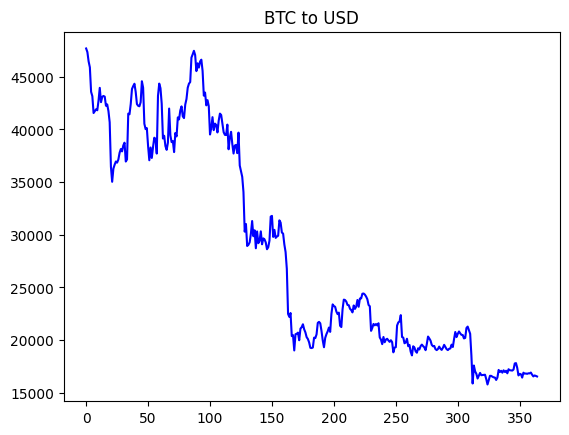

In [3]:
plt.plot(rates, linestyle = "-", color = "b")
plt.title("BTC to USD")
plt.show()

## Question 5
Below is a horizontal box and whisker plot of the BTC to USD over the year of 2022.

We must first calculate the differences between each day using numpy.diff()

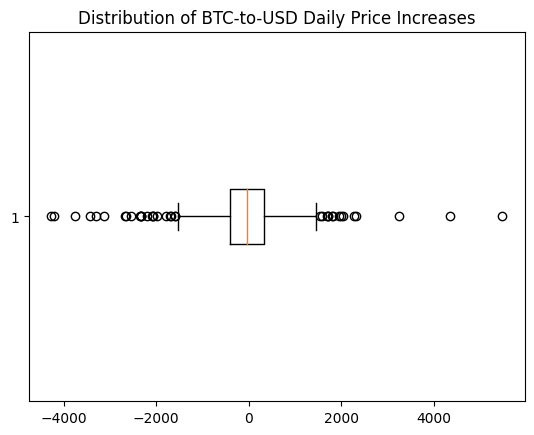

In [4]:
diffRates = np.diff(rates)

plt.boxplot(diffRates, vert=False)
plt.title("Distribution of BTC-to-USD Daily Price Increases")
plt.show()

In the above box and whisker plot we can see quite a bit about our price difference data. The median line is centred slightly below zero, denoting that the median difference in price was negative. The first and third quartiles (outer edges of the box) are relatively close to zero, showing that the variance in price day to day was commonly small in comparison to the previous day. That is to say 50% of the data points were within this range. 
The outliers on the outside of the whiskers show us occurences when the price jump or fall was outside of the normal day to day changes. 

## Postgraduate Tasks. Question 1
We must first calculate the arthimetic mean, then plot the point seperately

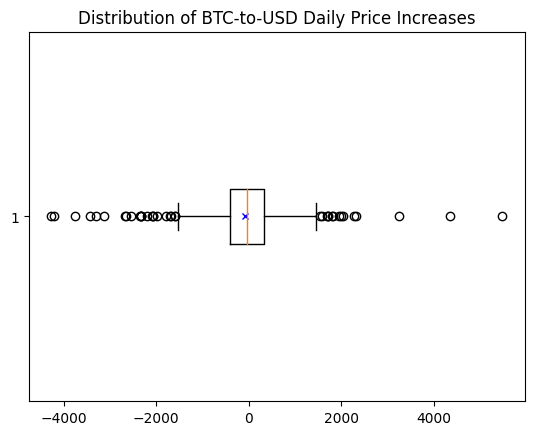

In [5]:
aMean = np.mean(diffRates)
plt.boxplot(diffRates, vert = False)
plt.plot(aMean,1, "bx", markersize = 5)  
plt.title("Distribution of BTC-to-USD Daily Price Increases")
plt.show()

## Question 2
To detemine the day with the lowest price and highest price we must find the index of min and max respectively using argmin and argmax

In [6]:
minDay = rates.argmin()
maxDay = rates.argmax()

print(f"Min Day: {minDay}")
print(f"Max Day: {maxDay}")

Min Day: 324
Max Day: 0


## Question 3
To determine how many outliers there are on the box plot we must calculate the number of points that are less than Lower Quartile - 1.5* IQR and sum them with the number of points that are greater than Upper Quartile + 1.5*IQR.

We must first calculate the Q1, Q3 and IQR of this new data set.  
We then conduct a check and return an array where all elements of the array are greater than the upper limit or less than the lower limit.  
We then sum the two results and print the total number of outliers.  

In [7]:
firstQuartile = np.percentile(diffRates, 25)
thirdQuartile = np.percentile(diffRates,75) 
iqr = thirdQuartile-firstQuartile

lowerLimit = firstQuartile - 1.5*iqr
upperLimit = thirdQuartile + 1.5*iqr

numLowOutliers = diffRates[diffRates<lowerLimit] 
numHighOutliers = diffRates[diffRates>upperLimit]
totalOutliers = len(numLowOutliers)+len(numHighOutliers)
print(f"Total number of outliers is: {totalOutliers}")


Total number of outliers is: 38


## Discussion

When a data set is normally distributed then almost all the data points should fall within the whiskers of the box and whisker plot. From our analysis we can see that 38 out of 365 (~10%) of the data points fall outside this range and can be considered to be outliers. 
Due to the volatility of the cryptocurrency market and the large deltas in price from day to day of BTC we can see that the data is not normally distributed. 